**TIẾN HÀNH THÍ NGHIÊM VỚI : MAX_LEN=55; BATCH_SIZE=32, EPOCH=100,  patience=5, lr=0.001: Accuracy 68%**


In [1]:
import os
working_dir ='/kaggle/input/6class-cmt'
os.chdir(working_dir)
!ls

cyberbullying_tweets.csv


#Tiền xử lí 

In [2]:
import re
import csv
from sklearn.model_selection import train_test_split
import pickle

def clean_text(text):
    # Xóa các từ bắt đầu bằng #
    text = re.sub(r'#\w+', '', text)

    # Xóa các từ bắt đầu bằng @
    text = re.sub(r'@\w+', '', text)

    # Xóa các đường dẫn (URLs)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # Giữ lại các ký tự chữ cái, số, và các ký tự đặc biệt mong muốn
    text = re.sub(r"[^a-zA-Z\s']", '', text)

    # Xóa khoảng trắng thừa
    text = re.sub(r'\s+', ' ', text).strip()
    text = text.lower()

    return text

def get_data(file_path):
    with open(file_path, encoding='utf-8', errors='replace') as csvfile:
        csvreader = csv.reader(csvfile)
        data = [row for row in csvreader if any(field.strip() for field in row)]
    return data

# Đọc dữ liệu
all_data = get_data('/kaggle/input/6class-cmt/cyberbullying_tweets.csv')

# Tách tiêu đề và dữ liệu
header = all_data[0]
data = all_data[1:]

# Tách cột văn bản và nhãn
texts = [row[0] for row in data]
labels = [row[1] for row in data]

# Tiền xử lý toàn bộ văn bản
clean_texts = [clean_text(text) for text in texts]

# Chia dữ liệu thành train và test với tỷ lệ 80:20
train_text, test_text, train_labels, test_labels = train_test_split(
    clean_texts, labels, test_size=0.2, random_state=42, stratify=labels
)

# Chia tập train thành train và valid với tỷ lệ 80:20
train_text, valid_text, train_labels, valid_labels = train_test_split(
    train_text, train_labels, test_size=0.2, random_state=42, stratify=train_labels
)

# Hàm để lưu dữ liệu vào tệp pickle
def save_pickle(data, filename):
    with open(filename, 'wb') as f:
        pickle.dump(data, f)

# Lưu các tập dữ liệu
save_pickle(train_text, '/kaggle/working/train_text.pkl')
save_pickle(train_labels, '/kaggle/working/train_labels.pkl')
save_pickle(valid_text, '/kaggle/working/valid_text.pkl')
save_pickle(valid_labels, '/kaggle/working/valid_labels.pkl')
save_pickle(test_text, '/kaggle/working/test_text.pkl')
save_pickle(test_labels, '/kaggle/working/test_labels.pkl')

print("Đã chia và lưu dữ liệu thành công!")

Đã chia và lưu dữ liệu thành công!


#trực quan dữ liệu 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


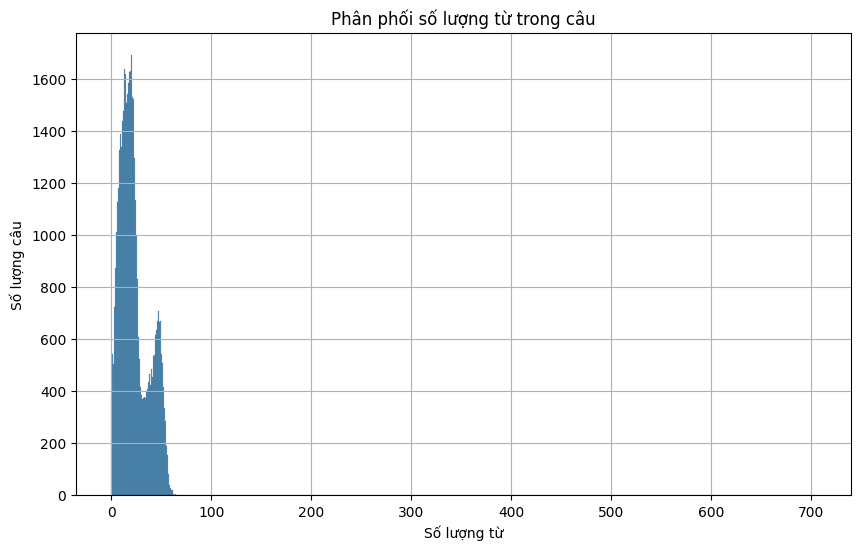

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Hàm để tính số lượng từ trong câu
def count_words(text):
    return len(text.split())

# Tính số lượng từ cho mỗi câu trong toàn bộ dữ liệu
word_counts = [count_words(text) for text in clean_texts]

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.histplot(word_counts, bins=np.arange(0, max(word_counts) + 1, 1), kde=False)
plt.title('Phân phối số lượng từ trong câu')
plt.xlabel('Số lượng từ')
plt.ylabel('Số lượng câu')
plt.grid(True)
plt.show()


In [6]:
#chọn 55 sau khi quan sát biểu đồ
max_len=55

In [6]:
print([train_text[i] for i in range(5)])

['why why was he because your woman trump says so because he is black no its because he had a heart if anything the didnt pass anything he wanted to do so if anyone is corrupt its the republicans and your seeing it now with the way they have handled everything in the past years', "here's to everyone who thinks they don't have to go to college", 'well one of her mates have been emailing me on facebook asking if she got bullied at our school but i bet she told cont', "lmfao rt trendsetting dumb shit that yall coons follow lol but that's enough for my rant for the day fuck you niggers", "i've seen it before microbrain i just told you every verse of the tao te ching is superior to every verse of quran"]


In [9]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pickle
import tensorflow as tf
import numpy as np
import pickle
from sklearn.preprocessing import LabelBinarizer
import keras_nlp
from sklearn.preprocessing import LabelBinarizer

#Tinh chỉnh bert 

In [10]:

# Tải mô-đun BERT
preprocessor = keras_nlp.models.BertPreprocessor.from_preset("bert_base_en_uncased",sequence_length=max_len, truncate="round_robin")
encoder = keras_nlp.models.BertBackbone.from_preset("bert_base_en_uncased",max_sequence_length=max_len)

In [12]:
#Ví dụ 1 câu sau khi tokenizer bằng bộ preprocessor của bert
text_test = ['This movie is an extraordinary masterpiece that captivates the audience from the very beginning with its stunning visuals, compelling storyline, and outstanding performances by the cast, making it an unforgettable cinematic experience that resonates deeply with viewers, evoking a wide range of emotions from joy and laughter to tears and contemplation, as it explores profound themes of love, loss, and redemption, all while maintaining a perfect balance of drama, action, and humor, ensuring that every moment is engaging and thought-provoking, leaving a lasting impact on the audience long after the credits roll, and solidifying its place as one of the greatest films ever made, a true testament to the power of storytelling and the magic of cinema!........']

# Preprocess the text (convert to KerasTensor)
text_preprocessed = preprocessor(tf.constant(text_test))

# Print the preprocessed text
print(text_preprocessed)



{'token_ids': <tf.Tensor: shape=(1, 55), dtype=int32, numpy=
array([[  101,  2023,  3185,  2003,  2019,  9313, 17743,  2008, 14408,
        21466,  2015,  1996,  4378,  2013,  1996,  2200,  2927,  2007,
         2049, 14726, 26749,  1010, 17075,  9994,  1010,  1998,  5151,
         4616,  2011,  1996,  3459,  1010,  2437,  2009,  2019,  4895,
        29278, 18150, 10880, 21014,  3325,  2008, 24501, 21149,  2015,
         6171,  2007,  7193,  1010, 23408, 23212,  3070,  1037,  2898,
          102]], dtype=int32)>, 'segment_ids': <tf.Tensor: shape=(1, 55), dtype=int32, numpy=
array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)>, 'padding_mask': <tf.Tensor: shape=(1, 55), dtype=bool, numpy=
array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         

In [11]:

# Đặt encoder thành non-trainable
encoder.trainable = False

# Định nghĩa hàm để tiền xử lý văn bản
def preprocess_text(texts):
    return preprocessor(texts)

# Định nghĩa hàm để xây dựng mô hình phân loại BERT
def build_classifier_model():
    # Lớp đầu vào cho dữ liệu văn bản
    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
    
    # Tiền xử lý đầu vào văn bản
    encoder_inputs = preprocess_text(text_input)
    
    # Mã hóa đầu vào với BERT encoder (đã đóng băng các tham số)
    encoder_outputs = encoder(encoder_inputs)
    net = encoder_outputs['pooled_output']
    
    # Dropout để tránh overfitting
    net = tf.keras.layers.Dropout(0.1)(net)
    
    # Lớp đầu ra để phân loại
    net = tf.keras.layers.Dense(6, activation='softmax', name='classifier')(net)
    
    return tf.keras.Model(inputs=text_input, outputs=net)

# Xây dựng mô hình
model = build_classifier_model()
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ text (InputLayer)   │ (None)            │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bert_preprocessor_1 │ [(None, 55),      │          0 │ text[0][0]        │
│ (BertPreprocessor)  │ (None, 55),       │            │                   │
│                     │ (None, 55)]       │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bert_backbone       │ [(None, 768),     │ 109,482,2… │ bert_preprocesso… │
│ (BertBackbone)      │ (None, 55, 768)]  │            │ bert_preprocesso… │
│                     │                   │            │ bert_preprocesso… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_24          │ (None, 768)       │          0 │ bert_backbone[0]… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ classifier (Dense)  │ (None, 6)         │      4,614 │ dropout_24[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 109,486,854 (417.66 MB)

 Trainable params: 4,614 (18.02 KB)

 Non-trainable params: 109,482,240 (417.64 MB)

In [12]:
def load_pickle(filename):
    with open(filename, 'rb') as f:
        return pickle.load(f)

# Load train, valid, and test data
train_text = load_pickle('/kaggle/working/train_text.pkl')
train_labels = load_pickle('/kaggle/working/train_labels.pkl')
valid_text = load_pickle('/kaggle/working/valid_text.pkl')
valid_labels = load_pickle('/kaggle/working/valid_labels.pkl')
test_text = load_pickle('/kaggle/working/test_text.pkl')
test_labels = load_pickle('/kaggle/working/test_labels.pkl')

# Hợp nhất tất cả các nhãn để xác định tất cả các lớp
all_labels = np.concatenate([train_labels, valid_labels, test_labels])

# Khởi tạo LabelBinarizer và mã hóa tất cả các nhãn
label_binarizer = LabelBinarizer()
label_binarizer.fit(all_labels)  # Học tất cả các lớp từ nhãn hợp nhất

# Mã hóa nhãn cho từng tập dữ liệu
train_labels_binary = label_binarizer.transform(train_labels)
valid_labels_binary = label_binarizer.transform(valid_labels)
test_labels_binary = label_binarizer.transform(test_labels)

# In ra nhãn gốc và nhãn sau khi mã hóa (nhị phân)
for i in range(10):  # Hiển thị 10 mẫu đầu tiên
    print(f"Nhãn gốc: {train_labels[i]} -> Nhãn nhị phân: {train_labels_binary[i]}")

# Đảm bảo dữ liệu văn bản có kiểu 'object'
train_text = np.array(train_text, dtype=object)
valid_text = np.array(valid_text, dtype=object)
test_text = np.array(test_text, dtype=object)

def create_dataset(texts, labels, batch_size=32):
    dataset = tf.data.Dataset.from_tensor_slices((texts, labels))
    dataset = dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return dataset

# Tạo các tập dữ liệu
train_dataset = create_dataset(train_text, train_labels_binary)
valid_dataset = create_dataset(valid_text, valid_labels_binary)
test_dataset = create_dataset(test_text, test_labels_binary)




Nhãn gốc: ethnicity -> Nhãn nhị phân: [0 1 0 0 0 0]
Nhãn gốc: not_cyberbullying -> Nhãn nhị phân: [0 0 0 1 0 0]
Nhãn gốc: other_cyberbullying -> Nhãn nhị phân: [0 0 0 0 1 0]
Nhãn gốc: ethnicity -> Nhãn nhị phân: [0 1 0 0 0 0]
Nhãn gốc: religion -> Nhãn nhị phân: [0 0 0 0 0 1]
Nhãn gốc: other_cyberbullying -> Nhãn nhị phân: [0 0 0 0 1 0]
Nhãn gốc: not_cyberbullying -> Nhãn nhị phân: [0 0 0 1 0 0]
Nhãn gốc: not_cyberbullying -> Nhãn nhị phân: [0 0 0 1 0 0]
Nhãn gốc: age -> Nhãn nhị phân: [1 0 0 0 0 0]
Nhãn gốc: age -> Nhãn nhị phân: [1 0 0 0 0 0]


In [17]:
# In ra danh sách các nhãn đại diện
label_classes = label_binarizer.classes_
print("Danh sách các nhãn đại diện:", label_classes)


Danh sách các nhãn đại diện: ['age' 'ethnicity' 'gender' 'not_cyberbullying' 'other_cyberbullying'
 'religion']


#Biên dịch và huấn luyện

In [13]:
import tensorflow as tf
from tensorflow import keras

# Tối ưu hóa với Adam optimizer
adam = tf.keras.optimizers.Adam(learning_rate=0.001)

# Sử dụng độ đo Categorical Accuracy và hàm loss phù hợp
metric_acc = tf.keras.metrics.CategoricalAccuracy(name="categorical_accuracy")
loss_func = tf.keras.losses.CategoricalCrossentropy(name='categorical_crossentropy')

# Biên dịch mô hình với optimizer, loss function và metric
model.compile(optimizer=adam, loss=loss_func, metrics=[metric_acc], jit_compile=False)

# Cơ chế dừng sớm với nhiều callback nếu cần
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Thêm callback để lưu mô hình tốt nhất (optional)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('/kaggle/working/best_model.keras', save_best_only=True, monitor='val_loss')

try:
    # Huấn luyện mô hình với tập huấn luyện và validation, sử dụng callback
    history = model.fit(
        train_dataset, 
        validation_data=valid_dataset, 
        epochs=100, 
        callbacks=[early_stopping, model_checkpoint],
        verbose=2  # Cung cấp thêm thông tin về quá trình huấn luyện
    )
    
    # Đánh giá mô hình trên tập kiểm tra
    test_loss, test_accuracy = model.evaluate(test_dataset, verbose=2)
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4%}")
    
except Exception as e:
    print(f"An error occurred: {e}")


Epoch 1/100
954/954 - 118s - 123ms/step - categorical_accuracy: 0.4699 - loss: 1.3674 - val_categorical_accuracy: 0.5727 - val_loss: 1.1559
Epoch 2/100
954/954 - 96s - 101ms/step - categorical_accuracy: 0.5747 - loss: 1.1363 - val_categorical_accuracy: 0.6158 - val_loss: 1.0397
Epoch 3/100
954/954 - 96s - 101ms/step - categorical_accuracy: 0.5991 - loss: 1.0660 - val_categorical_accuracy: 0.6290 - val_loss: 0.9828
Epoch 4/100
954/954 - 97s - 102ms/step - categorical_accuracy: 0.6143 - loss: 1.0222 - val_categorical_accuracy: 0.6467 - val_loss: 0.9318
Epoch 5/100
954/954 - 96s - 101ms/step - categorical_accuracy: 0.6213 - loss: 1.0029 - val_categorical_accuracy: 0.6525 - val_loss: 0.9097
Epoch 6/100
954/954 - 96s - 101ms/step - categorical_accuracy: 0.6248 - loss: 0.9884 - val_categorical_accuracy: 0.6675 - val_loss: 0.8780
Epoch 7/100
954/954 - 95s - 99ms/step - categorical_accuracy: 0.6317 - loss: 0.9744 - val_categorical_accuracy: 0.6523 - val_loss: 0.8962
Epoch 8/100
954/954 - 97s -

#Tải trọng số tốt nhất sau khi trainning

In [16]:
# # Đặt encoder thành non-trainable
# encoder.trainable = False

# # Định nghĩa lại mô hình phân loại
# def build_classifier_model():
#     text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
#     encoder_inputs = preprocessor(text_input)
#     encoder_outputs = encoder(encoder_inputs)
#     net = encoder_outputs['pooled_output']
#     net = tf.keras.layers.Dropout(0.3)(net)
#     net = tf.keras.layers.Dense(6, activation='softmax', name='classifier')(net)
#     return tf.keras.Model(inputs=text_input, outputs=net)

# # Xây dựng mô hình
# model = build_classifier_model()

# Tải trọng số từ tệp đã lưu
model.load_weights('/kaggle/working/best_model.keras')


#đánh giá trên tập test
1. precision
2. recall
3. f1-scores 
4. confusion matrix

299/299 ━━━━━━━━━━━━━━━━━━━━ 22s 73ms/step
Classification Report:
                     precision    recall  f1-score   support

                age       0.72      0.91      0.80      1598
          ethnicity       0.87      0.78      0.82      1592
             gender       0.79      0.66      0.72      1595
  not_cyberbullying       0.43      0.73      0.54      1589
other_cyberbullying       0.69      0.10      0.18      1565
           religion       0.80      0.91      0.85      1600

           accuracy                           0.68      9539
          macro avg       0.72      0.68      0.65      9539
       weighted avg       0.72      0.68      0.65      9539



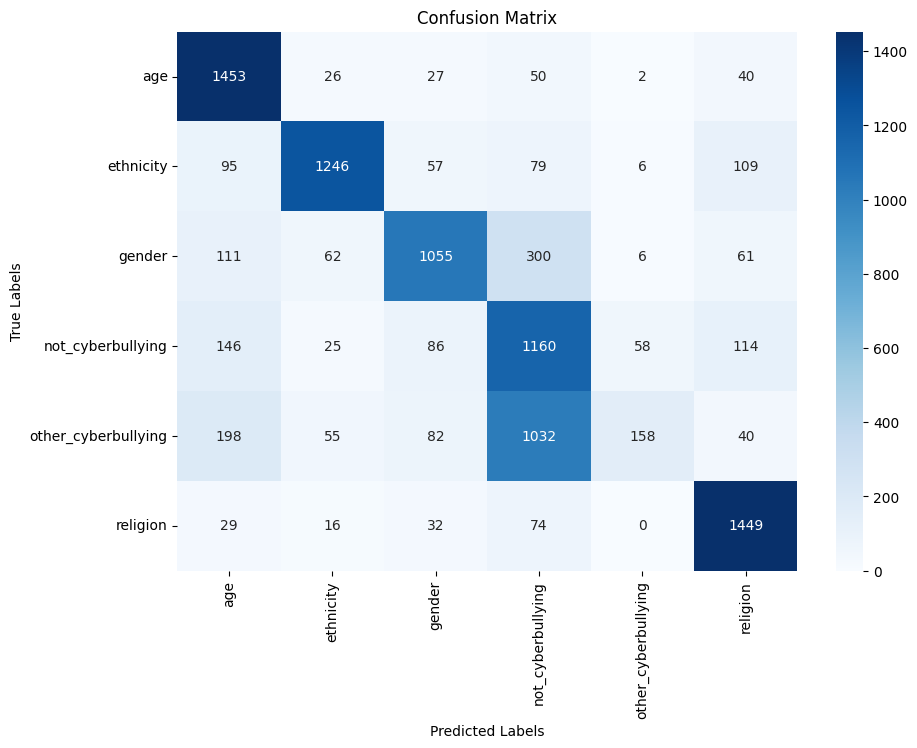

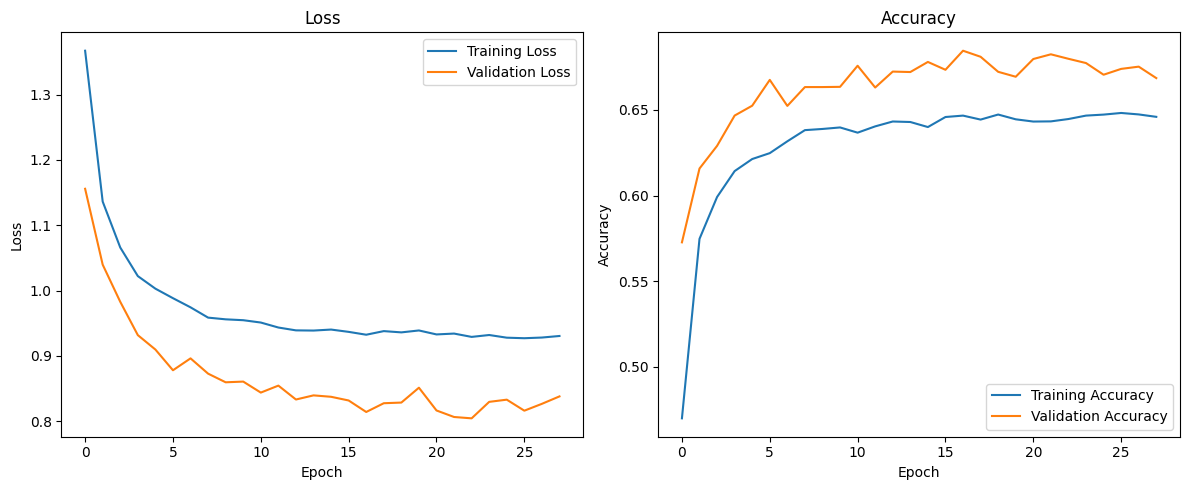

In [19]:
    from sklearn.metrics import classification_report, confusion_matrix
    # Dự đoán nhãn cho tập dữ liệu kiểm tra
    predictions = model.predict(test_text)
    predicted_labels = np.argmax(predictions, axis=1)
    true_labels = np.argmax(test_labels_binary, axis=1)
    
    # Tạo báo cáo phân loại
    class_names = label_binarizer.classes_
    print("Classification Report:")
    print(classification_report(true_labels, predicted_labels, target_names=class_names))
    
    # Vẽ confusion matrix
    conf_matrix = confusion_matrix(true_labels, predicted_labels)
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

    # Vẽ biểu đồ loss và accuracy
    plt.figure(figsize=(12, 5))
    
    # Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    # Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['categorical_accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_categorical_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

#Thực nghiệm

In [32]:
def preprocess_text(texts):
    # Tiền xử lý văn bản đầu vào cho mô hình
    return np.array(texts, dtype=object)

# Vòng lặp dự đoán
while True:
    input_text = input("Nhập văn bản (hoặc để trống để dừng): ")
    if input_text == '':
        break
    else:
        # Tiền xử lý văn bản
        processed_text = preprocess_text([input_text])

        # Dự đoán với mô hình
        predictions = model.predict(processed_text)
        predicted_label = np.argmax(predictions, axis=1)

        # Hiển thị kết quả dự đoán
        class_names = label_binarizer.classes_
        print(f"Dự đoán: {class_names[predicted_label[0]]}")

# In ra thông báo khi vòng lặp kết thúc
print("Kết thúc dự đoán.")


Nhập văn bản (hoặc để trống để dừng):  how old are you


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Dự đoán: not_cyberbullying


Nhập văn bản (hoặc để trống để dừng):  


Kết thúc dự đoán.
